In [1]:
import gymnasium as gym
import numpy as np
from gymnasium.utils import seeding
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from time import sleep
from IPython import display 
from IPython.display import clear_output
import os

In [3]:
path = os.getcwd()

In [4]:
env = gym.make('Taxi-v3',render_mode="ansi")

init_state = env.reset()

In [5]:
num_states = env.observation_space.n
num_actions = env.action_space.n

print(f"number of states: {num_states}")
print(f"number of actions: {num_actions}")

print(env.observation_space)
print(env.action_space)

number of states: 500
number of actions: 6
Discrete(500)
Discrete(6)


### Monte Carlo

In [6]:
Q = np.zeros((num_states, num_actions))
#print(Q)
num_episodes = 30000
alpha = 0.1  # learning rate      Recommended: 0.0< alpha <0.5
gamma = 0.99 
max_step = 300
epsilon = 0.8
max_epsilon = 1.0
min_epsilon = 0.15
decay_rate = 0.00005

for episode in range(num_episodes):
    
    rwd_per_episode = 0
    
    done = None
    
    gamma_list = []
    
    state = env.reset()[0]
    #print(state)
    step = 0 
    #for step in range(max_step):
    while not done:    
        gamma  = 0.99     # discount factor    Recommended: 0.6< gamma <1.0
        
        if np.random.uniform(0, 1) < epsilon:         #In training phase "Epsilon-Greedy Policy" is taken
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        new_state, reward, done, _, info = env.step(action)
        #print(new_state, reward, done, _, info)
        gamma_list.append(gamma ** (step))
        
        #print(gamma_list)
        reward2 = gamma_list[step] * reward
        rwd_per_episode += reward2
        #print("Episode :" , episode , "Reward :",reward)
        state = new_state
        if step >= 50:
            break
        step += 1
        #print(step,state)
    Q[state, action] = Q[state, action] + alpha * (rwd_per_episode - Q[state, action])
    
    #epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
#print(Q)

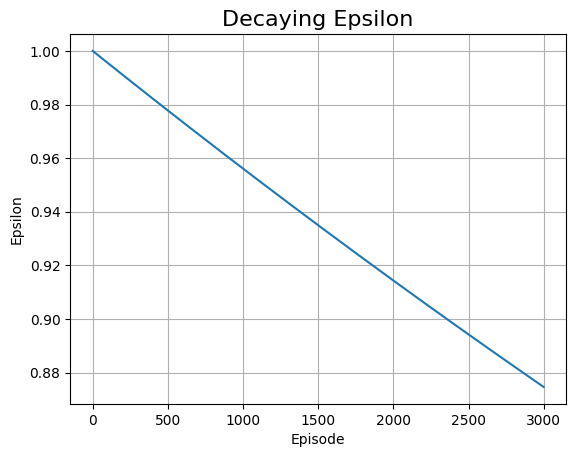

In [7]:
ghh = np.arange(3000)
epss_list = []
for i in range(len(ghh)):
    epsilonn = 0.1 + (1.0 - 0.1) * np.exp(-0.00005 * ghh[i])
    epss_list.append(epsilonn)
    
plt.title('Decaying Epsilon',fontsize = 16)
plt.plot(ghh,epss_list)
plt.ylabel('Epsilon')
plt.xlabel('Episode')
plt.grid()
plt.show()
#print(epss_list)

### Q_table creation and save

In [8]:
columns = ['south','north','east','west','pickup','drop off']

Q_df = pd.DataFrame(Q,columns = columns)
Q_df
Q_df.to_csv(os.path.join(path,r"Q_table_MC.csv"))    #Q_table for monte Carlo is saved

KeyboardInterrupt: 

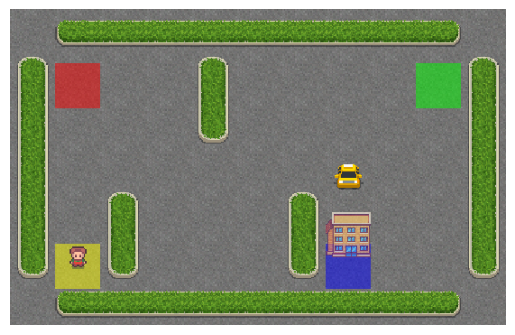

In [13]:
                #Monte Carlo algorithm is taken based on On-Policy method.
    
Q = Q_df.to_numpy()

env = gym.make('Taxi-v3',render_mode="rgb_array")
                                         #"rgb_array" mode rendering of training phase for
                                            # algorithm included decaying epsilon value policy (Gamma: 0.8, 
                                                #constant learning rate)
state_apply = env.reset()[0]
done = None 
while done != True:
    action = np.argmax(Q[state_apply])           #In applied phase "Greedy Policy" is taken 
                                                    # We just take the action with highest Q_value
    state_apply, reward, done, _, info = env.step(action)
    #print(env.render())
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    